In [2]:
# 数据根目录
data_path = "/home/queahren/文档/A28_Data_Test"


In [ ]:
# ResNet 提取坐标轴文本数据
from resNet.getNum import getNum
getNum(data_path)

In [18]:
# 预处理数据，生成灰度图于 gray 文件夹、unet预测的兴趣区域 mask 图于 mask 文件夹

import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt
import shutil

filepath = data_path + "/images"
filename = os.listdir(filepath)  #图像名列表
base_dir = filepath + "/"
new_dir = data_path + "/mask/" #以\\结尾
gray_dir = data_path + "/gray/"

if not os.path.exists(new_dir):
    os.mkdir(new_dir)
if not os.path.exists(gray_dir):
    os.mkdir(gray_dir)
    
for img in filename:
    if(img.endswith('.png')):
        im = cv2.imread(base_dir+img)      
        gray_img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        ret, binary_img = cv2.threshold(gray_img, -1, 255, cv2.THRESH_BINARY)       
        cv2.imwrite(new_dir+img.split('.')[0] + "_mask.png", binary_img)
        cv2.imwrite(gray_dir+img, gray_img)

In [17]:
# UNET 提取折线/曲线 至 result 文件夹
 
from unet.predict_unet import predict_unet
import cv2

save_path = data_path + "/result/"

base_dir = data_path + "/images"
filename = os.listdir(base_dir)
base_dir = data_path + "/"

if not os.path.exists(save_path):
    os.mkdir(save_path)

count = 0
for imgname in filename:
    if(imgname.endswith('.png')):
        count += 1
        print(imgname, count/len(filename))
        predict_unet(base_dir, imgname, save_path)

curve_7.png 0.047619047619047616
using cuda:0 device.
inference+NMS time: 0.020249128341674805
line_212.png 0.09523809523809523
using cuda:0 device.
inference+NMS time: 0.022275924682617188
curve_218.png 0.14285714285714285
using cuda:0 device.
inference+NMS time: 0.01399087905883789
line_338.png 0.19047619047619047
using cuda:0 device.
inference+NMS time: 0.013883113861083984
line_174.png 0.23809523809523808
using cuda:0 device.
inference+NMS time: 0.01388859748840332
curve_6.png 0.2857142857142857
using cuda:0 device.
inference+NMS time: 0.01382303237915039
line_421.png 0.3333333333333333
using cuda:0 device.
inference+NMS time: 0.014948844909667969
line_356.png 0.38095238095238093
using cuda:0 device.
inference+NMS time: 0.015244483947753906
curve_284.png 0.42857142857142855
using cuda:0 device.
inference+NMS time: 0.014997482299804688
line_408.png 0.47619047619047616
using cuda:0 device.
inference+NMS time: 0.014578819274902344
line_225.png 0.5238095238095238
using cuda:0 device.
i

line_174.png
line_205.png
line_212.png
line_225.png
line_286.png
line_338.png
line_356.png
line_390.png
line_408.png
line_421.png
curve_6.png
curve_7.png
curve_22.png
curve_39.png
curve_40.png
curve_218.png
curve_222.png
curve_242.png
curve_277.png
curve_281.png
curve_284.png


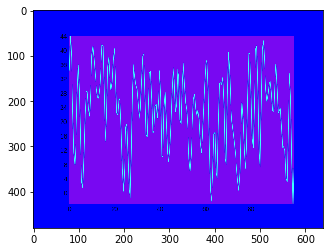

In [3]:
# 通过转化为 HSV 空间，利用 UNet 获取到的 result 进行进一步提取，置于 enhanceResult 文件夹中 

from enhanceMask import enhanceMask
data_path = "/home/queahren/文档/A28_Data_Test"
enhanceMask(data_path,"line")
enhanceMask(data_path,"curve")

In [1]:
from createYpixel import createYpixel
from createExcel import createExcel
data_path = "/home/queahren/文档/A28_Data_Test"
createYpixel(data_path)
createExcel(data_path)

curve_6_mask
80.5
0
[191, 181, 172, 163, 153, 143, 134, 125, 115, 107, 99, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 102, 109, 116, 123, 131, 137, 146, 152, 169, 167, 175, 182]
[162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218]
[180, 169, 157, 145, 134, 131, 110, 98, 87, 75, 64, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 64, 73, 82, 92, 100, 109, 118, 127, 136, 145, 154, 163, 172, 181]
[147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

0
[204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204]
[182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257]
[209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 

[120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 122, 131, 140]
[155, 156, 157, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]
[128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 135, 144, 154, 163, 172, 181]
[161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202]
1
[142, 138, 134, 130, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128

0
[188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188]
[122, 123, 124, 125, 126, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
0
[211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 212, 214, 216, 218]
[120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134]
1
[223, 222, 221, 219, 218, 216, 215, 214, 212, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 212, 212, 211, 214, 215, 216, 217, 217, 218, 219, 220]
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184

curve_281_mask
51.0
0
[143, 139, 134, 128, 117, 120, 118, 113, 110, 106, 101, 98, 93, 89, 85, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 90, 102, 115, 128, 140]
[261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363

0
[232, 229, 226, 223, 220, 216, 213, 210, 207, 204, 201, 198, 195, 191, 188, 185, 182, 179, 176, 173, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 172, 175, 178, 181, 184, 187, 190, 194, 197, 200, 203, 206, 210, 213, 218]
[154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
[243, 240, 236, 233, 230, 226, 223, 220, 216, 213, 210, 206, 203, 200, 196, 193, 190, 186, 183, 180, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 

0
[208, 140, 110, 140, 208]
[221, 222, 223, 224, 225]
[216, 144, 117, 153, 225]
[223, 224, 225, 226, 227]
1
[222, 204, 187, 170, 152, 135, 119, 117, 117, 117, 117, 117, 120, 123, 126, 129, 132, 136, 139, 142, 146, 149, 152, 155, 158, 161, 165, 168, 171, 175, 178, 181, 184, 187, 191, 195, 198, 201, 204, 208, 211, 214, 217, 221, 224, 227, 230, 234, 237]
[180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228]
2
[237, 227, 216, 207, 196, 186, 176, 166, 156, 146, 129, 117, 170]
[344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356]
3
[219, 197, 171, 123, 122, 175, 237]
[143, 144, 145, 146, 147, 148, 149]
4
[202, 179, 156, 132, 112, 110, 110, 126, 150]
[255, 256, 257, 258, 259, 260, 261, 262, 263]
[224, 199, 175, 150, 126, 117, 117, 124, 149, 173, 198, 223]
[249, 250, 251, 252, 253, 254, 255, 2